In [0]:
 
from google.colab import drive

drive.mount('/content/drive')

In [0]:
cd 'drive'

/content/drive


In [0]:
ls


'My Drive'/


In [0]:
cd 'My Drive'


/content/drive/My Drive


In [0]:
ls


'Colab Notebooks'/            Details.gsheet   pyaar.mp4
'Copy of Fest Dates.gsheet'   movie/           Resume.gdoc
 dataset/                     project/        'videos!!'/


In [0]:
cd 'project'

/content/drive/My Drive/project


In [0]:
ls


dataset/  Untitled0.ipynb


In [0]:
from keras.models import Sequential

Using TensorFlow backend.


In [0]:
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten 
from keras.layers import Dense

In [0]:

classifier = Sequential()

In [0]:
classifier = Sequential()

#adding a convolution layer
classifier.add(Convolution2D(32 , 3 , 3 , input_shape = (64 , 64 , 3) , activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


#adding the second convolution layer
classifier.add(Convolution2D(32 , 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))


classifier.add(Flatten())

classifier.add(Dense(output_dim =  128 , activation = 'relu'))
classifier.add(Dense(output_dim = 128 , activation = 'relu'))
classifier.add(Dense(output_dim = 1 , activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [0]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [0]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 16,
                                                 class_mode = 'binary')

Found 160 images belonging to 2 classes.


In [0]:

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 16,
                                            class_mode = 'binary')

Found 56 images belonging to 2 classes.


In [0]:
from keras.callbacks import History 
history = History()

In [0]:

classifier.fit_generator(training_set,
                         samples_per_epoch = 160,
                         nb_epoch = 25,
                         validation_data = test_set,
                         nb_val_samples = 56,callbacks=[history])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., callbacks=[<keras.ca..., steps_per_epoch=10, epochs=25, validation_steps=56)`
  





Epoch 1/25





10/10 [==============================] - 70s 7s/step - loss: 0.7259 - acc: 0.4500 - val_loss: 0.6926 - val_acc: 0.5000
Epoch 2/25
10/10 [==============================] - 6s 633ms/step - loss: 0.6957 - acc: 0.4750 - val_loss: 0.6900 - val_acc: 0.5000
Epoch 3/25
10/10 [==============================] - 6s 633ms/step - loss: 0.6898 - acc: 0.5250 - val_loss: 0.6838 - val_acc: 0.6964
Epoch 4/25
10/10 [==============================] - 6s 632ms/step - loss: 0.7006 - acc: 0.5625 - val_loss: 0.6805 - val_acc: 0.5000
Epoch 5/25
10/10 [==============================] - 6s 624ms/step - loss: 0.6807 - acc: 0.6000 - val_loss: 0.6809 - val_acc: 0.5000
Epoch 6/25
10/10 [==============================] - 6s 633ms/step - loss: 0.6653 - acc: 0.6000 - val_loss: 0.6549 - val_acc: 0.7679
Epoch 7/25
10/10 [==============================] - 6s 632ms/step - loss: 0.5980 - acc: 0.7125 - val_loss: 0.6206 - val_acc: 0.5714
Epoch 8/25
10/10 [==============================] - 6s 622ms/step - lo

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [0]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


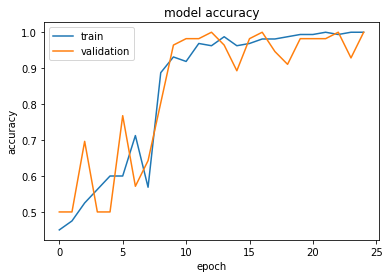

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
#accuaracy

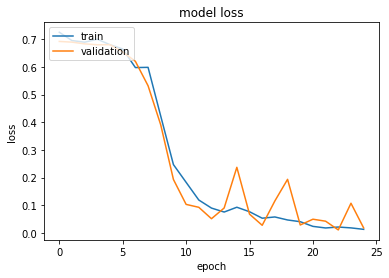

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
from keras.preprocessing import image

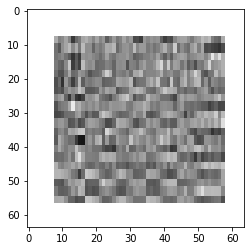

In [0]:
img = image.load_img('/content/drive/My Drive/project new/babyCry.png', target_size=(64, 64, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, 64, 64, 3)

In [0]:
y_prob = classifier.predict(img)

In [0]:
y_prob

array([[1.2026277e-06]], dtype=float32)